In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="6"

import mitsuba as mi
import drjit as dr
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from helpers.polarization_helpers import *
from helpers.render_helpers import *

print(mi.variants())
mi.set_variant("cuda_ad_rgb")

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized', 'cuda_ad_rgb', 'cuda_ad_mono', 'cuda_ad_mono_polarized', 'cuda_ad_spectral', 'cuda_ad_spectral_polarized']


In [ ]:
scene = mi.load_file("../scenes/simple_polarized_face.xml")
image = mi.render(scene, spp=128)

plt.axis("off")
plt.imshow(image ** (1.0 / 2.2))
plt.show()

In [3]:
spp = 128
scene = mi.load_file("../scenes/marcus_light_sphere.xml")

parallel = mi.render(scene, spp=spp)

params = mi.traverse(scene)
params["polarizer_cam.bsdf.theta.value"] = 90
params.update()

orthogonal = mi.render(scene, spp=spp)

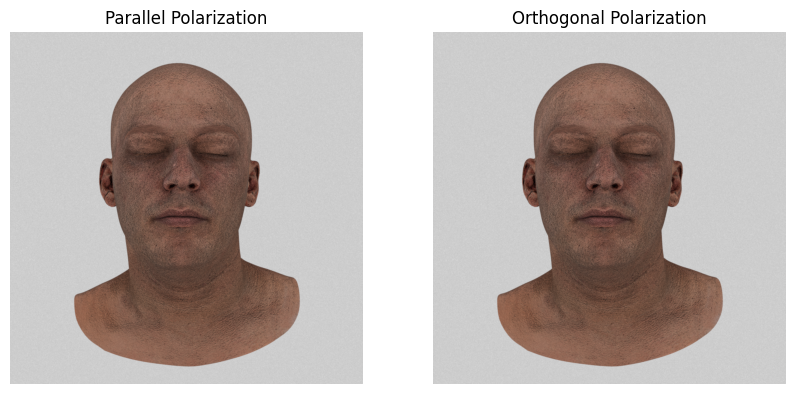

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

ax[0].imshow(parallel ** (1.0 / 2.2))
ax[0].axis("off")
ax[0].set_title("Parallel Polarization")

ax[1].imshow(orthogonal ** (1.0 / 2.2))
ax[1].axis("off")
ax[1].set_title("Orthogonal Polarization")

plt.show()

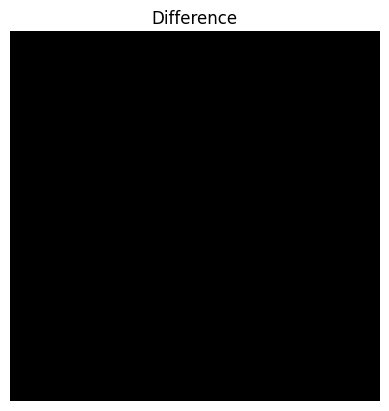

In [5]:
diff = np.abs(parallel - orthogonal)

plt.imshow(diff ** (1.0 / 2.2))
plt.axis("off")
plt.title("Difference")
plt.show()

In [6]:
unpol = 2 * np.fmin(parallel, orthogonal)
pol = parallel - unpol / 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.00014536544..1.2074798].


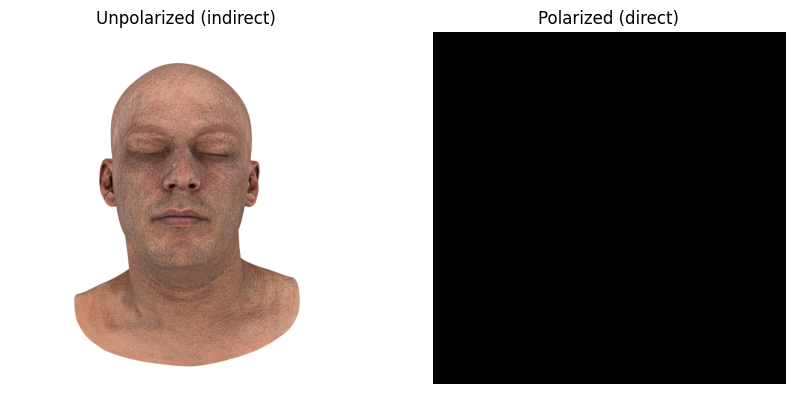

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 20))

ax[0].imshow(unpol ** (1.0 / 2.2))
ax[0].axis("off")
ax[0].set_title("Unpolarized (indirect)")

ax[1].imshow(pol ** (1.0 / 2.2))
ax[1].axis("off")
ax[1].set_title("Polarized (direct)")

plt.show()

In [ ]:
params = mi.traverse(scene)
print(params)